# Week 3: Statistical Inference for Business Decisions

In this notebook, we'll apply statistical methods to real marketing and business scenarios. We'll cover:
* Confidence Intervals for estimating conversion rates
* Hypothesis Testing for population mean
* Bayesian Inference for decision making under uncertainty

First, let's import our required libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## Part 1: Confidence Intervals

### Scenario: Email Campaign Analysis
You're analyzing the results of an email campaign. A key question: What's the true conversion rate?

Let's look at the data:

In [4]:
# Sample data
campaign = {
    'sends': 10000,
    'conversions': 450  # 4.5% conversion rate
}

# Calculate point estimate
conv_rate = campaign['conversions'] / campaign['sends']

print(f'Campaign conversion rate: {conv_rate:.1%}')

Campaign conversion rate: 4.5%


### Exercise 1: Calculate Confidence Interval

A point estimate alone can be misleading. Let's calculate a 95% confidence interval to understand the uncertainty.

Formula for confidence interval of a proportion:
* p ± z * sqrt(p * (1-p) / n)
where:
* p is the point estimate (conversion rate)
* n is the sample size (number of sends)
* z is the z-score (1.96 for 95% confidence)

In [7]:
def calculate_ci(successes, trials, confidence=0.95):
    p = successes / trials
    z = stats.norm.ppf((1 + confidence) / 2)
    se = np.sqrt(p * (1 - p) / trials)
    lower = p - z * se
    upper = p + z * se
    return max(0, lower), min(1, upper)
ci = calculate_ci(campaign['conversions'], campaign['sends'])
print(f'Campaign: {conv_rate:.1%} ({ci[0]:.1%}, {ci[1]:.1%})')

Campaign: 4.5% (4.1%, 4.9%)


### Exercise 2: Enhance the Confidence Interval Visualization

The basic visualization below shows the point estimate and confidence interval. Try enhancing it by:
1. Adding a normal distribution curve to show uncertainty
2. Highlighting the confidence interval region
3. Adding a target line at 5%

Hints:
- Use `numpy.linspace()` to create x-values
- Use `scipy.stats.norm.pdf()` for normal distribution
- Use `plt.fill_between()` for shading regions
- Use `plt.axvline()` for vertical lines

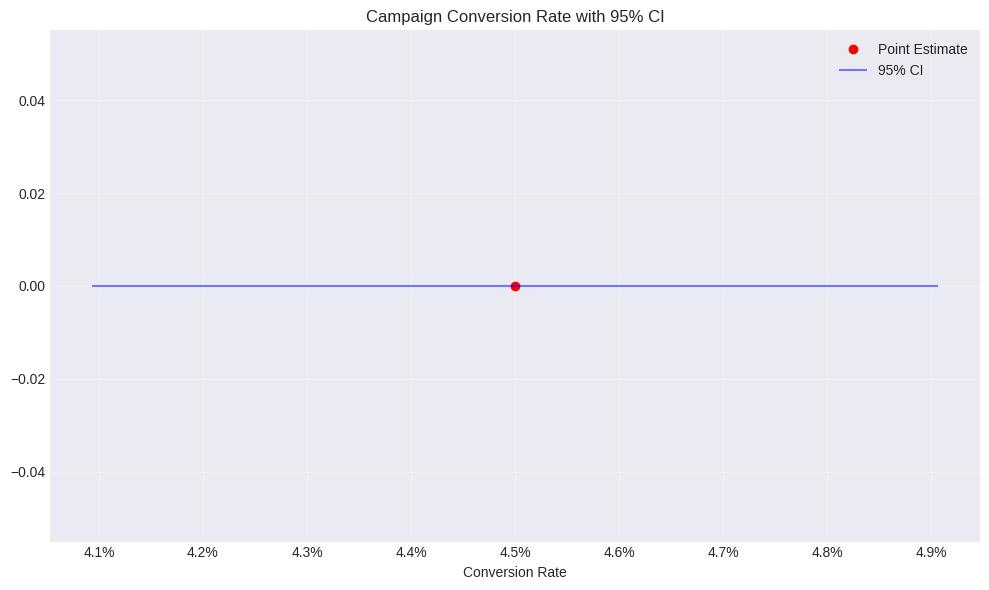

In [8]:

def plot_ci_basic(point_estimate, ci):
    """Create a basic visualization of conversion rate and confidence interval."""
    plt.figure(figsize=(10, 6))

    # Add point estimate
    plt.plot(point_estimate, 0, 'ro', label='Point Estimate')

    # Add confidence interval line
    plt.hlines(0, ci[0], ci[1], color='blue', alpha=0.5, label='95% CI')

    plt.xlabel('Conversion Rate')
    plt.title('Campaign Conversion Rate with 95% CI')
    plt.grid(True, alpha=0.3)

    # Format x-axis as percentages
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))

    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot basic visualization
plot_ci_basic(conv_rate, ci)

### Questions:

1. Looking at the confidence interval:
   - What's the range of plausible conversion rates?
   - How would you explain this uncertainty to stakeholders?
   - What factors affect the width of this interval?

2. Business Impact:
   - If your target is 5%, what can you conclude?

## Part 2: Hypothesis Testing

### Scenario: New Feature Impact
Your team has implemented a new recommendation engine. You want to test if it achieves the target conversion rate of 6%.

Let's analyze the data:

In [9]:
# Sample data
feature_data = {
    'visitors': 15000,
    'purchases': 1050  # 7% conversion
}

# Calculate conversion rate
conv_rate = feature_data['purchases'] / feature_data['visitors']
print(f'Actual conversion rate: {conv_rate:.1%}')
print(f'Target conversion rate: 6.0%')

Actual conversion rate: 7.0%
Target conversion rate: 6.0%


### Exercise 3: Conduct Hypothesis Test

Test if the conversion rate meets the 6% target using a z-test.

Null hypothesis (H0): The conversion rate is 6%
Alternative hypothesis (H1): The conversion rate is different from 6%

In [ ]:
##

### Questions:

1. Statistical Analysis:
   - What does the p-value tell us?
   - Is the result statistically significant at α = 0.05?
   - What's our conclusion about the null hypothesis?

  The p value tells us if the result is statsitically significant meaning if the null hyptohesis was true, there is a p value % chance of obtaining the test result we received.

## Part 3: Bayesian Inference

### Exercise 4: Basic Bayes' Theorem - The Game Show App

You're developing a game show app and need to calculate winning probabilities. The game works like this:

1. There are three doors (1, 2, 3)
2. Behind one door is $1,000,000, behind others are $0
3. Player picks a door
4. Host (who knows door contents) opens a $0 door
5. Player can switch their choice

Your task: Calculate winning probabilities in different scenarios using Bayes' theorem:
```
P(A|B) = P(B|A) * P(A) / P(B)
```

**Scenario 1:**
- Player picked Door 1
- Host opened Door 2 showing $0
- Should player switch to Door 3?

**Scenario 2:**
- Player picked Door 2
- Host opened Door 3 showing $0
- Should player switch to Door 1?

In [10]:
def calculate_winning_probability(chosen_door, opened_door):
    """Calculate probability of winning for each door.

    Args:
        chosen_door: Door player chose (1, 2, or 3)
        opened_door: Door host opened showing $0 (1, 2, or 3)

    Returns:
        Dictionary with probabilities for staying vs switching
    """
    # Your calculations here
    # Remember:
    # 1. Prior: Each door has 1/3 probability
    # 2. Host MUST show a $0 door
    # 3. Host CANNOT open chosen door or money door

    # Example structure (replace with your calculations):
    return {
        'stay_probability': 0.0,  # P(Money behind chosen door | Host opened specific door)
        'switch_probability': 0.0  # P(Money behind other door | Host opened specific door)
    }

# Test scenarios
scenarios = [
    {'chosen': 1, 'opened': 2},
    {'chosen': 2, 'opened': 3}
]

for scenario in scenarios:
    print(f"\nScenario: Chose door {scenario['chosen']}, Host opened door {scenario['opened']}")
    probs = calculate_winning_probability(scenario['chosen'], scenario['opened'])
    print(f"Probability if stay: {probs['stay_probability']:.1%}")
    print(f"Probability if switch: {probs['switch_probability']:.1%}")


Scenario: Chose door 1, Host opened door 2
Probability if stay: 0.0%
Probability if switch: 0.0%

Scenario: Chose door 2, Host opened door 3
Probability if stay: 0.0%
Probability if switch: 0.0%


### Questions:

1. For each scenario, explain:
   - What was your prior probability for each door?
   - What evidence did you receive when host opened a door?
   - How did this change your probabilities?

2. Verify Your Results:
   - Do your probabilities sum to 1?
   - Are your results consistent across scenarios?
   - What happens if you change the opened door?


### Exercise 5: Market Entry with Prior Knowledge

You're launching in a new market. Based on historical data from similar markets, you expect a 5% conversion rate, but there's uncertainty.

**Why Bayesian?**
Traditional analytics often give you a single number—a point estimate. But in the real world, uncertainty is everywhere. Bayesian methods help you:
- Quantify your uncertainty
- Update beliefs with new data
- Make better decisions under uncertainty

Let's use Bayesian inference to update our beliefs as we collect data.

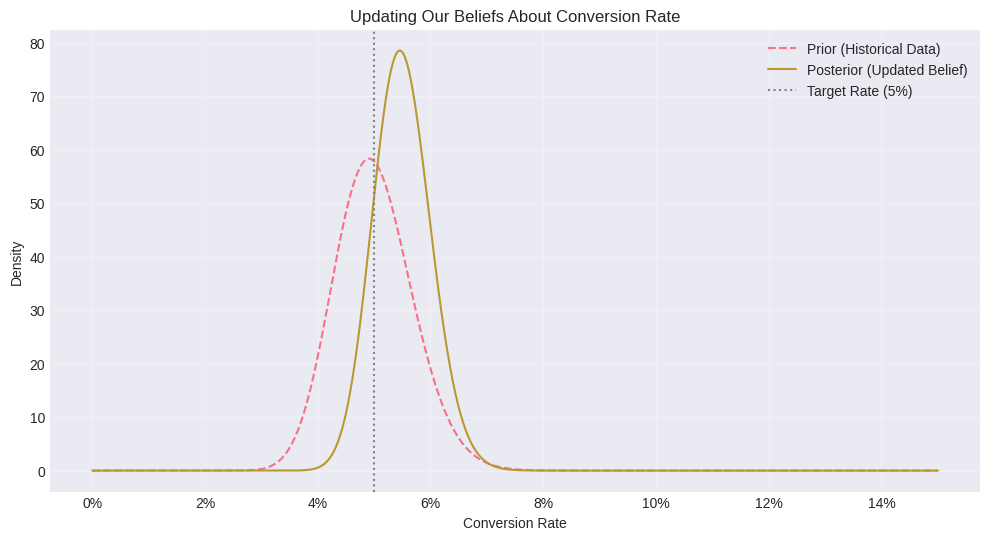

In [11]:
# Prior parameters
# Uninformative prior: Beta(1, 1) is flat and doesn't favor any value
# Informative prior: If you have historical data, set accordingly
prior_alpha = 50  # successes in historical data
prior_beta = 950   # failures in historical data

# New market data
new_visitors = 1000
new_conversions = 60  # 6% conversion rate

# Calculate posterior parameters
post_alpha = prior_alpha + new_conversions
post_beta = prior_beta + (new_visitors - new_conversions)

# Create distributions
x = np.linspace(0, 0.15, 1000)
prior_dist = stats.beta(prior_alpha, prior_beta)
post_dist = stats.beta(post_alpha, post_beta)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, prior_dist.pdf(x), label='Prior (Historical Data)', linestyle='--')
plt.plot(x, post_dist.pdf(x), label='Posterior (Updated Belief)')
plt.axvline(0.05, color='gray', linestyle=':', label='Target Rate (5%)')

plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.title('Updating Our Beliefs About Conversion Rate')
plt.legend()
plt.grid(True, alpha=0.3)

# Format x-axis as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.show()

### Exercise 6: Calculate Credible Interval

Unlike confidence intervals, credible intervals give us a direct probability statement about where we believe the true rate lies.

In [12]:
def bayes_posterior_beta_ci(prior_alpha, prior_beta, successes, trials, cred=0.95):
    """Return posterior mean and symmetric credible interval for a Bernoulli proportion."""
    a_post = prior_alpha + successes
    b_post = prior_beta + (trials - successes)
    lower  = stats.beta.ppf((1 - cred) / 2, a_post, b_post)
    upper  = stats.beta.ppf(1 - (1 - cred) / 2, a_post, b_post)
    mean   = a_post / (a_post + b_post)
    return mean, (lower, upper), (a_post, b_post)

posterior_mean, cred_int, post_params = bayes_posterior_beta_ci(
    prior_alpha, prior_beta, new_conversions, new_visitors, cred=0.95
)

print(f"Posterior mean: {posterior_mean:.2%}")
print(f"95% credible interval: [{cred_int[0]:.2%}, {cred_int[1]:.2%}]")
print(f"Posterior Beta params: alpha={post_params[0]}, beta={post_params[1]}")

Posterior mean: 5.50%
95% credible interval: [4.54%, 6.54%]
Posterior Beta params: alpha=110, beta=1890


### Questions

1. For each method (confidence intervals, hypothesis testing, Bayesian):
   - What are its strengths?
   - When would you use it?
   - How would you explain it to non-technical stakeholders?
